

# FINAL PROJECT

# Supervised machine learning model  to forecast the day ahead electricity price in Spain



**Objective:** The objective of this project is to predict the day ahead electricity price in Spain. For doing this we will use the historical spot price of electricity as the target variable we want to predict and other related variables such as the demand, generation, gas price... That can help us to predict the model.




## **1. Import libraries and data**


In [123]:

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the input dataset

data = pd.read_excel('ProjectData.xlsx')


## **2. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

1. How much data is there? How many attributes are there in the data?  
2. What do they mean?
3. Is there any missing data? 
4. Are the labels balanced? 
5. Statistical summary of the input data set.

1. **How much data is there? How many attributes are there in the data?**

In [28]:
# Data rows/columns

data.shape

(8760, 21)

In [29]:
# Look at the first 5 rows of the data

data.head()

,datetime,spot[€/MWh],weekend,Price_24,Price_48,Price_72,GasPrice,GasPrice_24,GasPrice_48,GasPrice_72,...,Demand[MWh],Interconnections,Nuclear [MWh],GenRenovables,Gas Cogen. [MWh],Wind,Hydro,Solar,freeCO2_gen,tCO2/Mwgen
0,2018-01-01T00:00:00+01:00,6.74,1,33.40,30.65,45.88,24.5,25.2,23.85,22.7,...,22828.167,-2110.2,7064.304,12784.833,1965.665,12498.343,2138.335,0.186,19843.000,0.100
1,2018-01-01T01:00:00+01:00,4.74,1,19.83,19.01,41.41,24.5,25.2,23.85,22.7,...,22125.000,-1006.0,7063.136,11351.333,1946.302,11224.051,1607.515,0.423,18407.667,0.096
2,2018-01-01T02:00:00+01:00,3.66,1,9.80,18.51,37.06,24.5,25.2,23.85,22.7,...,20716.500,-1214.1,7062.809,9875.833,1924.204,9531.400,1644.103,0.116,16934.000,0.108
3,2018-01-01T03:00:00+01:00,2.30,1,8.70,17.19,32.32,24.5,25.2,23.85,22.7,...,19614.167,1180.0,7064.156,6450.167,1918.053,6654.474,1418.898,0.651,13509.000,0.116
4,2018-01-01T04:00:00+01:00,2.30,1,5.27,15.44,32.99,24.5,25.2,23.85,22.7,...,18916.333,1193.0,7067.784,5755.500,1916.861,6509.587,1380.024,0.314,12822.500,0.119


**2. What do they mean?** 

***[Time, Day, Month]*** Time, day and month of each of the observations. They are integer values *int64*.

***[Hydro, Wind, Cyclocomb, Cogener, Nuclear, Coal, Biomass]*** refers to the hourly scheduled energy of the PVP program in the daily market by type of production of the previous day.  These are actual *float* values.

***[Demand]*** is the total scheduled energy in the daily electricity market in Spain on the previous day.  These are real *float* values.

***[price-elect-day-previous-day]*** price of electricity on the previous day. These are actual *float* values.

***[MIBGAS-previous-day]*** day-ahead natural gas price. These are actual *float* values.

***[Classes]*** are the price tags we want to predict.




In [30]:
# Data format

data.dtypes

datetime             object
spot[€/MWh]         float64
weekend               int64
Price_24            float64
Price_48            float64
Price_72            float64
GasPrice            float64
GasPrice_24         float64
GasPrice_48         float64
GasPrice_72         float64
TotalGen[MWh]       float64
Demand[MWh]         float64
Interconnections    float64
Nuclear [MWh]       float64
GenRenovables       float64
Gas Cogen. [MWh]    float64
Wind                float64
Hydro               float64
Solar               float64
freeCO2_gen         float64
tCO2/Mwgen          float64
dtype: object

In [124]:
# Convert day and hour in datetime format
data['datetime'] = pd.to_datetime(data['datetime'],utc=True)
data['datetime'] = data['datetime'].dt.tz_localize(None)

data.dtypes

datetime            datetime64[ns]
spot[€/MWh]                float64
weekend                      int64
Price_24                   float64
Price_48                   float64
Price_72                   float64
GasPrice                   float64
GasPrice_24                float64
GasPrice_48                float64
GasPrice_72                float64
TotalGen[MWh]              float64
Demand[MWh]                float64
Interconnections           float64
Nuclear [MWh]              float64
GenRenovables              float64
Gas Cogen. [MWh]           float64
Wind                       float64
Hydro                      float64
Solar                      float64
freeCO2_gen                float64
tCO2/Mwgen                 float64
dtype: object

We create month, day, and hour columns from the datetime variable

In [125]:

data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['hour'] = pd.DatetimeIndex(data['datetime']).hour


data

,datetime,spot[€/MWh],weekend,Price_24,Price_48,Price_72,GasPrice,GasPrice_24,GasPrice_48,GasPrice_72,...,GenRenovables,Gas Cogen. [MWh],Wind,Hydro,Solar,freeCO2_gen,tCO2/Mwgen,month,day,hour
0,2017-12-31 23:00:00,6.74,1,33.40,30.65,45.88,24.5,25.2,23.85,22.7,...,12784.833,1965.665,12498.343,2138.335,0.186,19843.000,0.100,12,31,23
1,2018-01-01 00:00:00,4.74,1,19.83,19.01,41.41,24.5,25.2,23.85,22.7,...,11351.333,1946.302,11224.051,1607.515,0.423,18407.667,0.096,1,1,0
2,2018-01-01 01:00:00,3.66,1,9.80,18.51,37.06,24.5,25.2,23.85,22.7,...,9875.833,1924.204,9531.400,1644.103,0.116,16934.000,0.108,1,1,1
3,2018-01-01 02:00:00,2.30,1,8.70,17.19,32.32,24.5,25.2,23.85,22.7,...,6450.167,1918.053,6654.474,1418.898,0.651,13509.000,0.116,1,1,2
4,2018-01-01 03:00:00,2.30,1,5.27,15.44,32.99,24.5,25.2,23.85,22.7,...,5755.500,1916.861,6509.587,1380.024,0.314,12822.500,0.119,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 18:00:00,68.85,0,67.02,65.27,68.93,24.6,24.8,24.90,24.5,...,9548.500,2497.967,3135.727,5695.555,69.653,15621.167,0.173,12,31,18
8756,2018-12-31 19:00:00,68.40,0,67.83,65.00,66.00,24.6,24.8,24.90,24.5,...,8869.333,2491.456,3320.586,5009.689,18.127,14942.333,0.171,12,31,19
8757,2018-12-31 20:00:00,66.88,0,68.40,64.60,62.09,24.6,24.8,24.90,24.5,...,7951.000,2497.602,3520.675,3835.050,16.205,14026.833,0.173,12,31,20
8758,2018-12-31 21:00:00,63.93,0,67.64,64.01,61.77,24.6,24.8,24.90,24.5,...,7127.667,2489.684,3574.666,3113.267,16.121,13202.000,0.176,12,31,21


The algorithm cannot interpret the numbers corresponding to the different months as independent variables but assumes that it is a single variable with more or less value (e.g. month 4 > than month 3). For this we would assign each month number to its name (string), but it would be necessary to pass from qualitative variables to quantitative variables since it cannot interpret strings either. To solve this we create different variables and assign a boolean value.
To simplify and improve the results we will differentiate by seasons and not by months.

In [126]:


data['winter'] = np.where((data['month']==12) | (data['month']<=2), 1, 0)
data['spring']= np.where((data['month']>=3) & (data['month']<=5), 1, 0)
data['summer']= np.where((data['month']>=6) &(data['month']<=8), 1, 0)
data['autumn']= np.where((data['month']>=9) &(data['month']<=11), 1, 0)



**3. Is any data missing?** 



In [34]:
### your code here
data.isna().sum()

datetime            0
spot[€/MWh]         0
weekend             0
Price_24            0
Price_48            0
Price_72            0
GasPrice            0
GasPrice_24         0
GasPrice_48         0
GasPrice_72         0
TotalGen[MWh]       0
Demand[MWh]         0
Interconnections    0
Nuclear [MWh]       0
GenRenovables       0
Gas Cogen. [MWh]    0
Wind                0
Hydro               0
Solar               0
freeCO2_gen         0
tCO2/Mwgen          0
month               0
day                 0
hour                0
winter              0
spring              0
summer              0
autumn              0
dtype: int64

**4. Summary statistics of the input data set:** 

Descriptive statistics collects and analyzes the input data set with the objective of describing the characteristics and behaviors of this set through the following summary measures: total number of observations (count), mean (mean), standard deviation (std), minimum value (min), maximum value (max) and the values of the different quartiles (25%, 50%, 75%).


In [35]:
# Statistical data for each attribute

data.describe()

,spot[€/MWh],weekend,Price_24,Price_48,Price_72,GasPrice,GasPrice_24,GasPrice_48,GasPrice_72,TotalGen[MWh],...,Solar,freeCO2_gen,tCO2/Mwgen,month,day,hour,winter,spring,summer,autumn
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,57.293954,0.271119,57.168904,57.105337,57.077313,24.546603,24.548247,24.545644,24.539616,27678.551259,...,1347.588354,17175.597487,0.205234,6.526027,15.720548,11.500000,0.246575,0.252055,0.252055,0.249315
std,12.800625,0.444563,12.980990,13.044241,13.056546,2.818649,2.818855,2.819060,2.820648,4530.516573,...,1655.855031,3920.792557,0.066820,3.448048,8.796749,6.922582,0.431042,0.434217,0.434217,0.432641
min,2.060000,0.000000,2.060000,2.060000,2.060000,18.870000,18.870000,18.870000,18.870000,16617.330000,...,0.032000,8710.167000,0.061000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.817500,0.000000,50.690000,50.637500,50.570000,22.450000,22.450000,22.450000,22.450000,24012.233000,...,19.978750,14266.708000,0.148750,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,60.000000,60.000000,59.995000,25.000000,25.000000,25.000000,25.000000,27414.893500,...,537.521000,16832.417000,0.213000,7.000000,16.000000,11.500000,0.000000,0.000000,0.000000,0.000000
75%,65.690000,1.000000,65.670000,65.670000,65.670000,26.300000,26.300000,26.300000,26.300000,31239.671750,...,2404.994500,19546.917000,0.258000,10.000000,23.000000,17.250000,0.000000,1.000000,1.000000,0.000000
max,84.130000,1.000000,84.130000,84.130000,84.130000,35.000000,35.000000,35.000000,35.000000,40982.825000,...,5734.754000,33059.000000,0.378000,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#With pandas profiling we can obtain a really useful report to check correlation between attributes and get  statistical information variables.
#import pandas_profiling
#report = pandas_profiling.ProfileReport(data)
#report.to_file("PandasProfiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **3. Visualize the data**.

A visual way to understand the input data. 

1. Relation between gas and electricity prices
2. Histogram
3. Boxplots
4. Correlation matrix

In [37]:
# plotly library for interacive plots
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import warnings
from ipywidgets import widgets
from ipywidgets import interact

# plotly settings to ignore warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)


trace1 = go.Scatter(
             x = data['datetime'],
             y = data['spot[€/MWh]'],
             mode = 'lines',
             name = 'Spot electricity')

trace2 = go.Scatter(
            x = data['datetime'],
            y = data['GasPrice'],
            mode = 'lines',
            name = 'gas price')

# create layout
layout = go.Layout(
    title = "Electricity vs Gas",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Value"})

 #create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)
# show figure
fig.show()

In [127]:
data.drop(['datetime'], axis=1, inplace=True)

**2. Histogram**

Graphical representation of each of the attributes in the form of bars, where the surface of the bar is proportional to the frequency of the values represented.

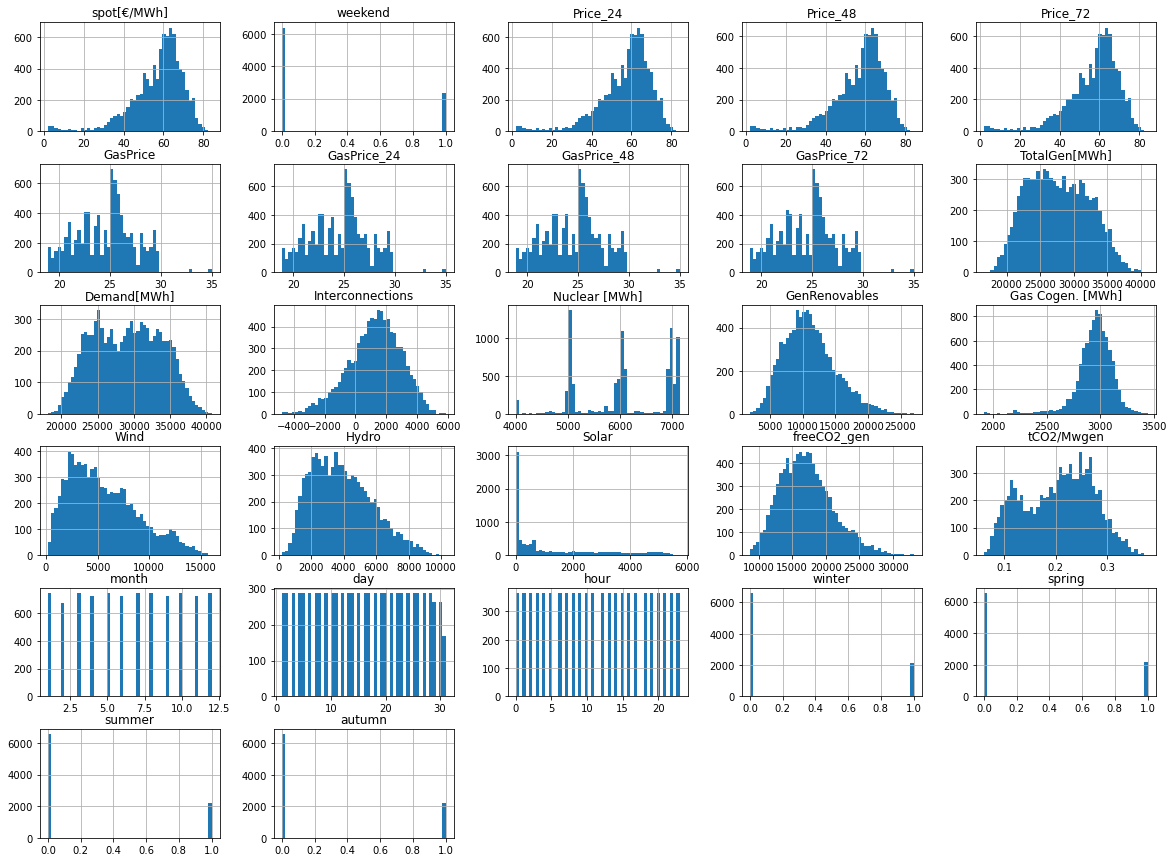

In [39]:
histogram = data.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(20, 15))

#histogram inform about distribution -> how many occurencys we have for values

**3. Boxplots** 

The boxplot allows us to identify outliers and compare distributions. In addition, we know how 50% of the values are distributed (within the box).

* Which attribute is striking because of its outliers? 

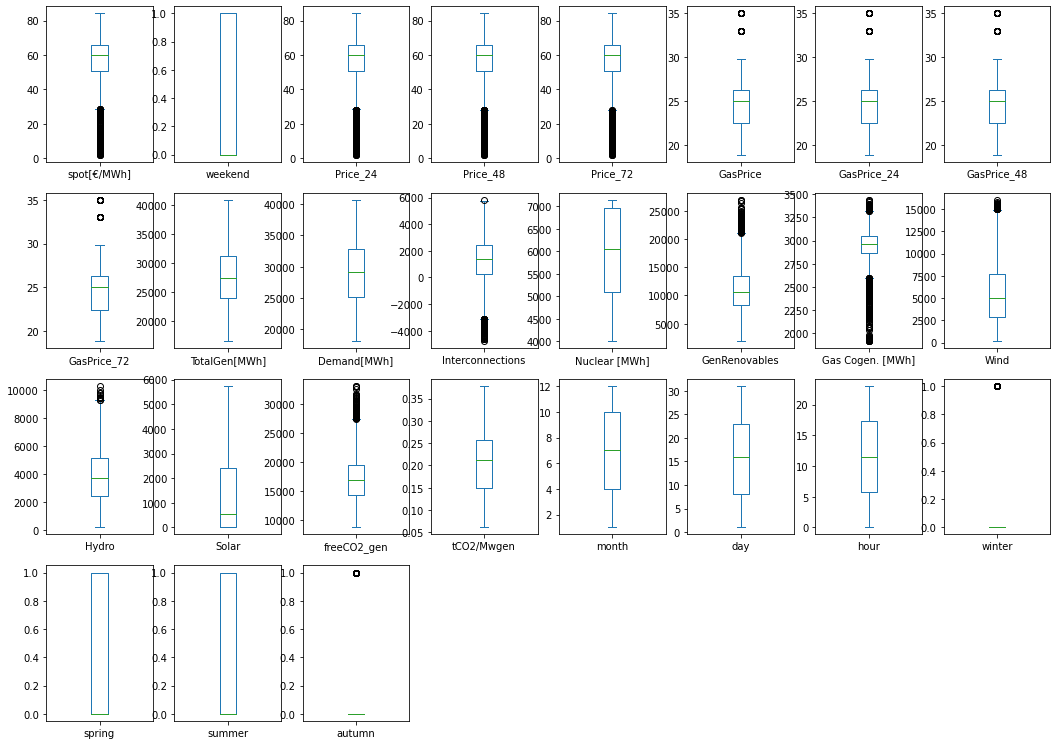

In [40]:
atributs_boxplot = data.plot(kind='box', subplots=True, layout=(6, 8), figsize=(18, 20), sharex=False,
                                 sharey=False, fontsize=10)

#inform about outlyers, quartiles, median, extreme values

**4. Correlation matrix**. 
We use Spearman's method to evaluate the monotonic relationship between two continuous variables. 

Comparison between [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **Which variable has no correlation with any attribute?** 

In [41]:
#correlation matrix: is giving us correlation between all the variables of our model
# Pearson vs Spearman correlation matrix 

import seaborn as sns

# Calculation of correlation coefficients by spearman
corr_matrix=data.corr(method='spearman')


corr_matrix

,spot[€/MWh],weekend,Price_24,Price_48,Price_72,GasPrice,GasPrice_24,GasPrice_48,GasPrice_72,TotalGen[MWh],...,Solar,freeCO2_gen,tCO2/Mwgen,month,day,hour,winter,spring,summer,autumn
spot[€/MWh],1.000000,-0.016798,0.824599,0.726662,0.723378,0.602262,0.616486,0.599972,0.572080,0.359529,...,0.195808,-0.234867,0.717841,0.551895,0.098711,0.231419,-0.114223,-0.501817,0.167225,0.449612
weekend,-0.016798,1.000000,-0.058665,-0.060504,-0.036885,-0.010444,-0.013592,-0.009077,-0.031874,-0.038661,...,0.016526,-0.033710,-0.004135,-0.004809,-0.009784,-0.000390,-0.020624,0.042802,-0.027579,0.005269
Price_24,0.824599,-0.058665,1.000000,0.825611,0.727777,0.587969,0.599501,0.616082,0.600942,0.283393,...,0.190350,-0.199213,0.606992,0.557107,0.091410,0.229234,-0.118740,-0.501841,0.166670,0.454694
Price_48,0.726662,-0.060504,0.825611,1.000000,0.826247,0.583148,0.585938,0.599389,0.617040,0.208755,...,0.181890,-0.170386,0.503526,0.563725,0.077680,0.227483,-0.126207,-0.499472,0.166227,0.460199
Price_72,0.723378,-0.036885,0.727777,0.826247,1.000000,0.581769,0.581741,0.586042,0.600159,0.198766,...,0.180771,-0.158050,0.474264,0.569770,0.070724,0.226478,-0.127563,-0.502661,0.164850,0.466133
GasPrice,0.602262,-0.010444,0.587969,0.583148,0.581769,1.000000,0.930029,0.870816,0.849515,0.059882,...,-0.011445,-0.260009,0.518007,0.690474,-0.018185,0.000000,-0.291593,-0.428028,0.092687,0.627077
GasPrice_24,0.616486,-0.013592,0.599501,0.585938,0.581741,0.930029,1.000000,0.929610,0.869473,0.109526,...,-0.015520,-0.225633,0.522947,0.692422,-0.048119,0.000000,-0.291605,-0.421575,0.080603,0.632742
GasPrice_48,0.599972,-0.009077,0.616082,0.599389,0.586042,0.870816,0.929610,1.000000,0.929545,0.105545,...,-0.017486,-0.203950,0.494544,0.693621,-0.041215,0.000000,-0.287909,-0.417100,0.069080,0.636132
GasPrice_72,0.572080,-0.031874,0.600942,0.617040,0.600159,0.849515,0.869473,0.929545,1.000000,0.061070,...,-0.018124,-0.213920,0.460913,0.696450,-0.041113,0.000000,-0.291986,-0.403754,0.057407,0.638515
TotalGen[MWh],0.359529,-0.038661,0.283393,0.208755,0.198766,0.059882,0.109526,0.105545,0.061070,1.000000,...,0.417762,0.688004,0.115718,-0.074872,0.001973,0.376851,0.117409,-0.057999,-0.090844,0.032411


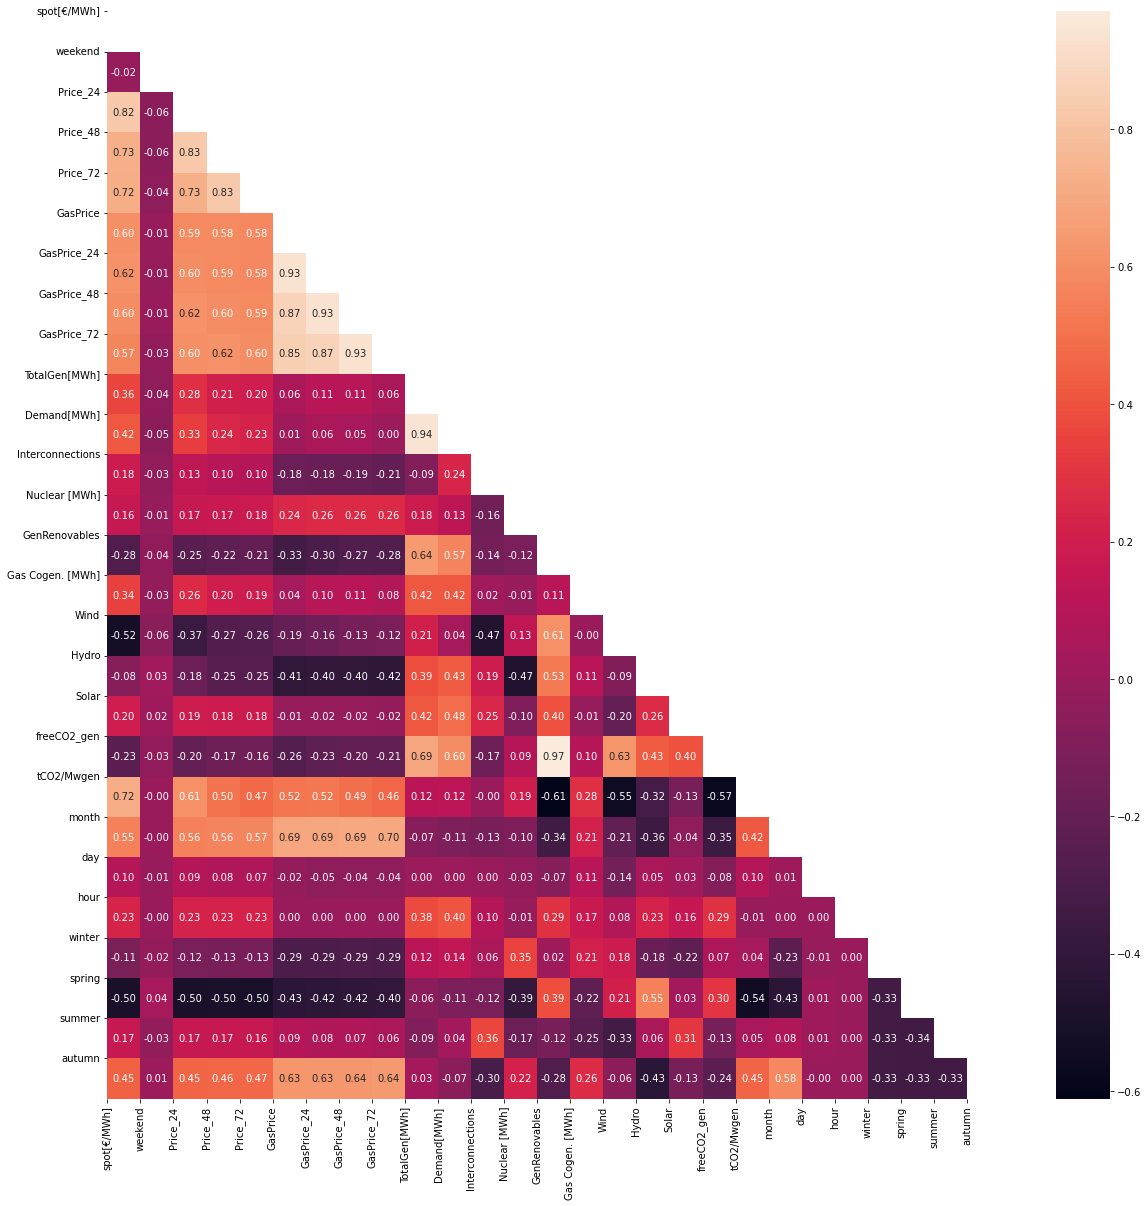

In [42]:

# Remove repeated values
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(20, 20))

#Generate Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

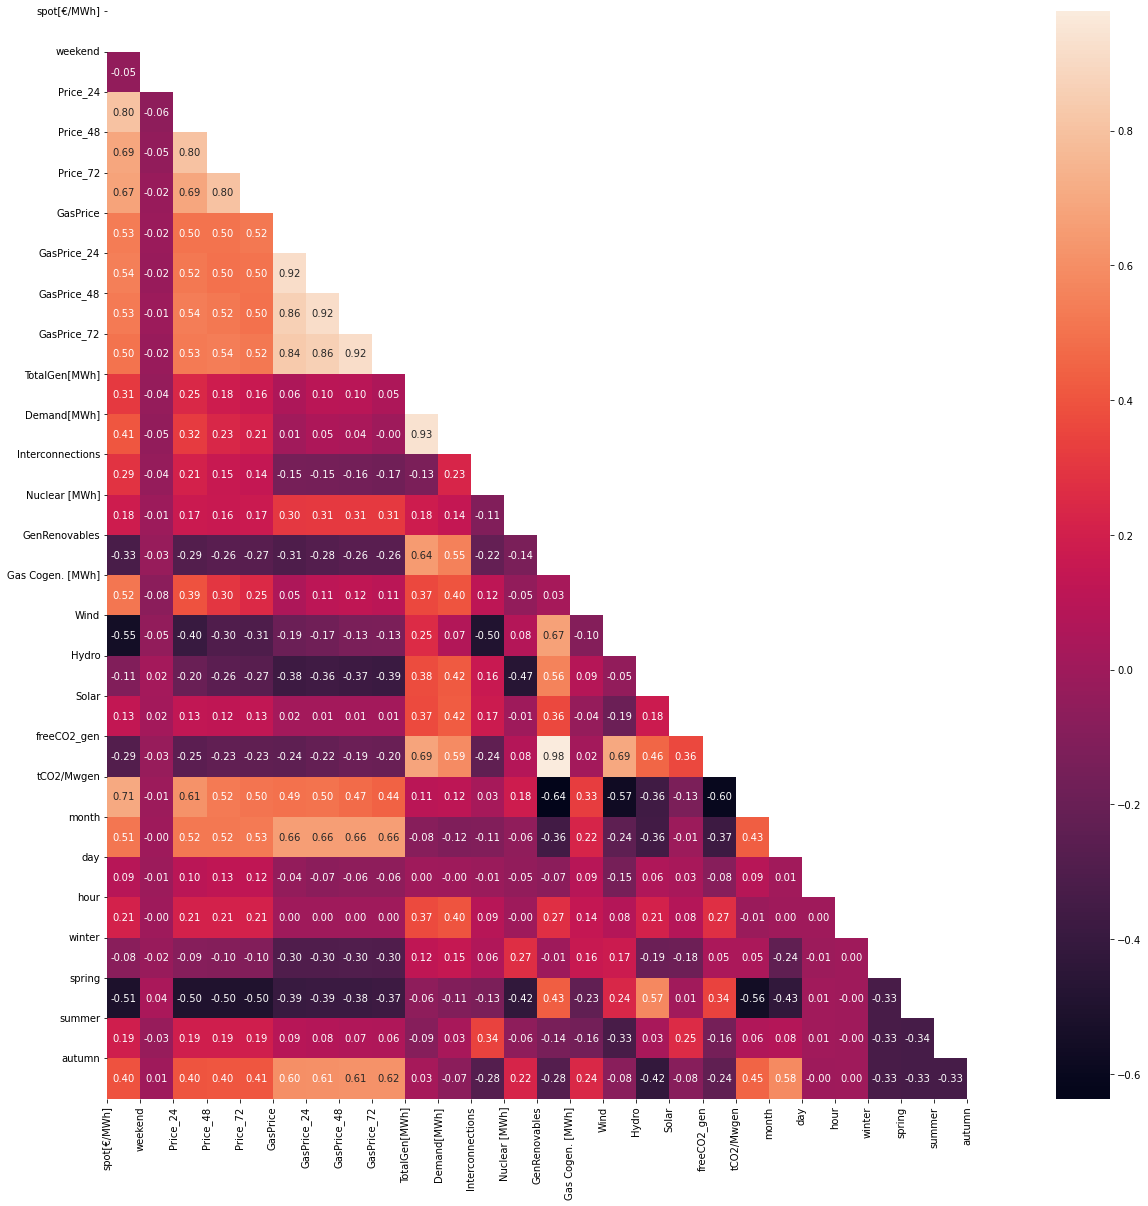

In [43]:
# Calculation of correlation coefficients by pearson
corr = data.corr(method='pearson') 

# Remove repeated values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
# xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# plot
plt.show()

## *4. Prepare the data*.


1. Data cleaning (remove outliers).
2. Transformation.

**1. Data cleaning**

As we have checked there are no Nan data in this dataset. 
Using the correlation matrix, the low correlated features rispect the **spot[€/MWh]** are deleted from the dataset as they affect negatively at the final prediction.

- we drop weekend, day, hydro, hour, winter, summer, solar and nuclear because of their irrelevant afectation to spot price (correlations lower than +-0,2 were deleted).
- we drop month, gas price24,48... because we have created the season variable which better represent it
- we drop freeCO2gen cause its big correlation with  renewablesGen 

In [128]:


data.drop(['weekend','day','month','winter','summer','hour','Solar', 'Nuclear [MWh]','Hydro','freeCO2_gen','GasPrice_24','GasPrice_48','GasPrice_72','TotalGen[MWh]','Price_48','Price_72'], axis=1,inplace=True)
data

,spot[€/MWh],Price_24,GasPrice,Demand[MWh],Interconnections,GenRenovables,Gas Cogen. [MWh],Wind,tCO2/Mwgen,spring,autumn
0,6.74,33.40,24.5,22828.167,-2110.2,12784.833,1965.665,12498.343,0.100,0,0
1,4.74,19.83,24.5,22125.000,-1006.0,11351.333,1946.302,11224.051,0.096,0,0
2,3.66,9.80,24.5,20716.500,-1214.1,9875.833,1924.204,9531.400,0.108,0,0
3,2.30,8.70,24.5,19614.167,1180.0,6450.167,1918.053,6654.474,0.116,0,0
4,2.30,5.27,24.5,18916.333,1193.0,5755.500,1916.861,6509.587,0.119,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,68.85,67.02,24.6,30658.667,4387.9,9548.500,2497.967,3135.727,0.173,0,0
8756,68.40,67.83,24.6,29852.333,4645.7,8869.333,2491.456,3320.586,0.171,0,0
8757,66.88,68.40,24.6,28274.500,4250.6,7951.000,2497.602,3520.675,0.173,0,0
8758,63.93,67.64,24.6,25925.500,3279.9,7127.667,2489.684,3574.666,0.176,0,0


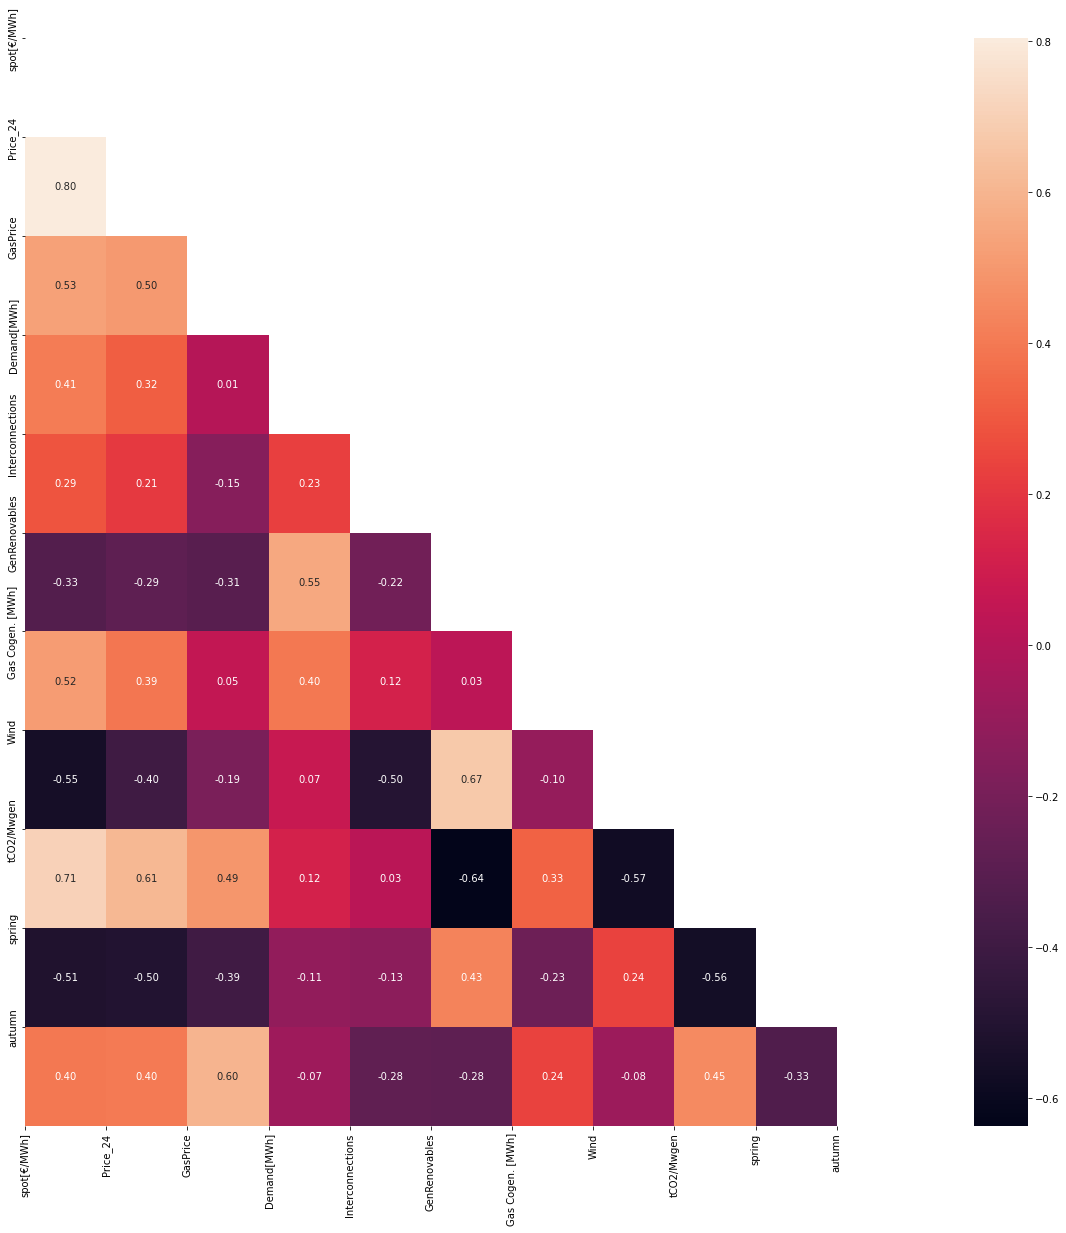

In [129]:
# Calculation of correlation coefficients by pearson
corr = data.corr(method='pearson') 

# Remove repeated values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
# xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# plot
plt.show()

**2. Data transformation**



The dataset is divided into **attributes**: X (features) and **tags**: y (target).

In [130]:
# Atributes X (features); labels y (target)
### your code here
#separamos la variable precio de las demas 

X=data.drop(['spot[€/MWh]'],axis=1)
y=data['spot[€/MWh]']


data

,spot[€/MWh],Price_24,GasPrice,Demand[MWh],Interconnections,GenRenovables,Gas Cogen. [MWh],Wind,tCO2/Mwgen,spring,autumn
0,6.74,33.40,24.5,22828.167,-2110.2,12784.833,1965.665,12498.343,0.100,0,0
1,4.74,19.83,24.5,22125.000,-1006.0,11351.333,1946.302,11224.051,0.096,0,0
2,3.66,9.80,24.5,20716.500,-1214.1,9875.833,1924.204,9531.400,0.108,0,0
3,2.30,8.70,24.5,19614.167,1180.0,6450.167,1918.053,6654.474,0.116,0,0
4,2.30,5.27,24.5,18916.333,1193.0,5755.500,1916.861,6509.587,0.119,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,68.85,67.02,24.6,30658.667,4387.9,9548.500,2497.967,3135.727,0.173,0,0
8756,68.40,67.83,24.6,29852.333,4645.7,8869.333,2491.456,3320.586,0.171,0,0
8757,66.88,68.40,24.6,28274.500,4250.6,7951.000,2497.602,3520.675,0.173,0,0
8758,63.93,67.64,24.6,25925.500,3279.9,7127.667,2489.684,3574.666,0.176,0,0


 
* **Scale the data using the *MinMaxScaler()* method within the range [0,1].**

In [131]:
from sklearn.preprocessing import MinMaxScaler

#Scaling attributes/features

scaler = MinMaxScaler()
X_df = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(X_df))
X_scaled.columns = X_df.columns
X_scaled.head()

,Price_24,GasPrice,Demand[MWh],Interconnections,GenRenovables,Gas Cogen. [MWh],Wind,tCO2/Mwgen,spring,autumn
0,0.381869,0.349039,0.207465,0.250590,0.433304,0.033702,0.776387,0.123028,0.0,0.0
1,0.216522,0.349039,0.176281,0.354754,0.376106,0.021024,0.696053,0.110410,0.0,0.0
2,0.094310,0.349039,0.113815,0.335123,0.317231,0.006555,0.589344,0.148265,0.0,0.0
3,0.080907,0.349039,0.064927,0.560968,0.180541,0.002527,0.407976,0.173502,0.0,0.0
4,0.039113,0.349039,0.033979,0.562195,0.152823,0.001747,0.398842,0.182965,0.0,0.0


In [132]:
scaler_y = MinMaxScaler()

# Target feature is scaled
y_df = y.copy()
y_df = pd.DataFrame(y_df)
y_scaled = scaler_y.fit_transform(y_df)
y_scaled = np.ravel(y_scaled)
y_scaled

array([0.05702449, 0.03265505, 0.01949555, ..., 0.78981357, 0.75386865,
       0.75801145])

## *5. Split data*
 

In [133]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # percentage of the input data that will be used to validate the model



# Data is divided into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)



## *6.  Model building and evaluation*

The selected evaluation metrics are **RMSE, MAE and R2**. 

In [134]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR


#each of the models is trained, the results are saved and compared visually.

num_folds = 10#most common value in machine learning
error_metrics = {'neg_root_mean_squared_error', 'r2','neg_mean_absolute_error'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor()),
          ('SVR', SVR()), ('AdaB', AdaBoostRegressor())}


Evaluation metric:  r2
Model  RFR
Model  AdaB
Model  MLP
Model  SVR
[('RFR', 0.4891650372859358, 0.4675804664146197), ('AdaB', 0.16538595656347072, 1.0160379398523505), ('MLP', 0.5111409708075787, 0.4322530183614473), ('SVR', 0.4293337079693508, 0.4458091159548595)]


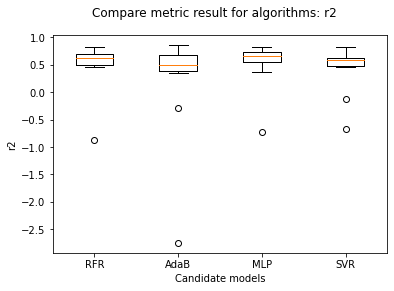

Evaluation metric:  neg_mean_absolute_error
Model  RFR
Model  AdaB
Model  MLP
Model  SVR
[('RFR', -0.05125526376351356, 0.018975314214475705), ('AdaB', -0.058133554042567245, 0.02118330741633641), ('MLP', -0.049935914112004265, 0.016854224604880636), ('SVR', -0.05505799057940267, 0.01640676505709785)]


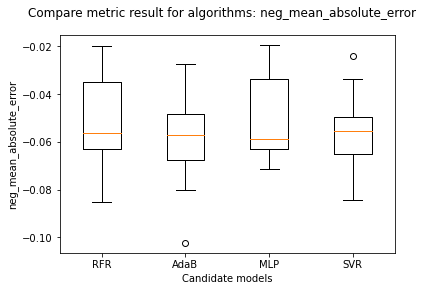

Evaluation metric:  neg_root_mean_squared_error
Model  RFR
Model  AdaB
Model  MLP
Model  SVR
[('RFR', -0.06733328027644975, 0.024762222974965276), ('AdaB', -0.07571506435756625, 0.023586465163471876), ('MLP', -0.062429774512977175, 0.020428757965242274), ('SVR', -0.07006513591908875, 0.024497241522121203)]


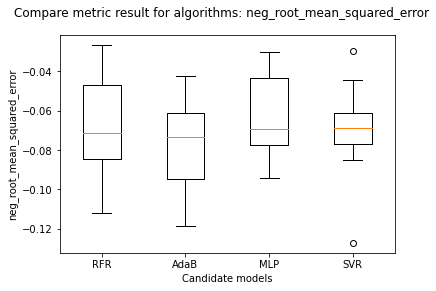

In [135]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []

## *7. Adjust hyperparameters*.

Steps to perform the hyperadjustment of the parameters:
* Specify the model to be adjusted
* Specify a metric to optimize
* Define the search parameter ranges: *params*
* Assign a validation method: *KFold*
* Find the Hyperparameters with the validation data: *X_val*

**MLP REGRESSOR**

In [136]:
modelo = MLPRegressor()
scoring='r2'
params = {"hidden_layer_sizes": [(1,),(50,),(100,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.00005,0.0005]}



# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: 0.668516 using the following hyperparameters {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}


In [137]:
modelo = MLPRegressor()
scoring='neg_mean_absolute_error'
params = {"hidden_layer_sizes": [(1,),(50,),(100,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.00005,0.0005]}



# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: -0.033249 using the following hyperparameters {'activation': 'logistic', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'solver': 'lbfgs'}


In [138]:
modelo = MLPRegressor()
scoring='neg_mean_squared_error'
params = {"hidden_layer_sizes": [(1,),(50,),(100,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.00005,0.0005]}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: -0.002125 using the following hyperparameters {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (1,), 'solver': 'lbfgs'}


**RANDOM FOREST**

In [139]:
modelo = RandomForestRegressor()
scoring='r2'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500, 800, 1000],  # default=100
     # Maximum number of levels in tree
    'max_depth': [1, 5, None],  #deafult = None
}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: 0.653011 using the following hyperparameters {'max_depth': None, 'n_estimators': 800}


In [140]:
modelo = RandomForestRegressor()
scoring='neg_mean_absolute_error'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500, 800, 1000],  # default=100
     # Maximum number of levels in tree
    'max_depth': [1, 5, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: -0.037401 using the following hyperparameters {'max_depth': None, 'n_estimators': 800}


In [141]:
modelo = RandomForestRegressor()
scoring='neg_mean_squared_error'
params = {
    # Number of trees in random forest
    'n_estimators': [100, 500, 800, 1000],  # default=100
     # Maximum number of levels in tree
    'max_depth': [1, 5, None],  #deafult = None
     # Method of selecting samples for training each tree
}


# Search for the best combination of hyperparameters
cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Print best Result
print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Best result: -0.002394 using the following hyperparameters {'max_depth': None, 'n_estimators': 1000}


## *8.  Final evaluation of the model*



Finally, predictions are made.

Evaluation metrics:
  * RMSE
  * R2

    
The ``fit()`` model is trained with the optimal hyperparameters found in the previous section and then the predictions are made.

**MLP REGRESSOR**

In [142]:
final_model = MLPRegressor(hidden_layer_sizes= (1,), activation='tanh', solver='lbfgs',alpha =0.005) 
final_model.fit(X_train,y_train)  # Model training 
y_predict = final_model.predict(X_test)  # Prediction calculation

It is necessary to invert the MinmaxScaler() scaling to evaluate our results in the original dimension.

In [143]:
import math 
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


# Invert the scaling and plot the results
y_test_unsc = np.reshape(y_test, (len(y_test), 1))
y_test_inv = scaler_y.inverse_transform(y_test_unsc)

y_predict_uns = np.reshape(y_predict, (len(y_predict), 1))
y_predict_inv = scaler_y.inverse_transform(y_predict_uns)

In [144]:
# Error RMSE de test  
math.sqrt(mean_squared_error(y_test_inv, y_predict_inv))

7.460180173441432

In [145]:
# R2 (coefficient of determination) regression score from test  
math.sqrt(r2_score(y_test_inv, y_predict_inv))

0.20897626902325042

In [146]:
# Error MAE from test  
math.sqrt(mean_absolute_error(y_test_inv, y_predict_inv))

2.453888808695762

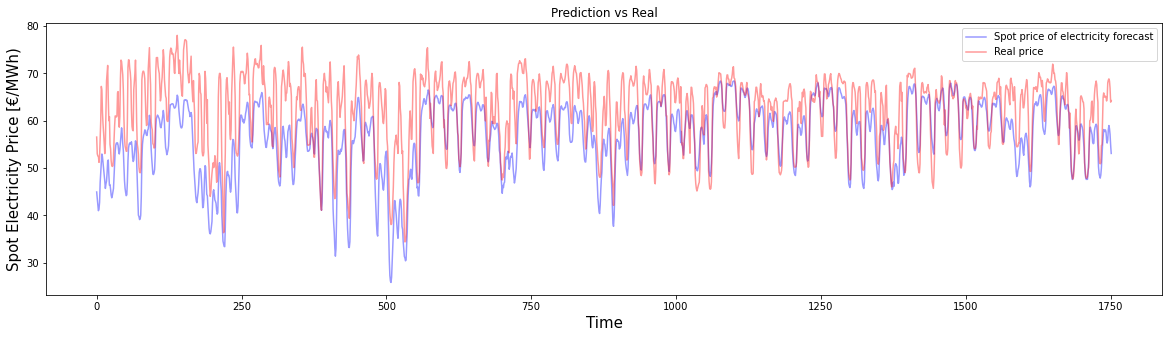

In [147]:
# Plot y_predict vs y_test

x = range(len(y_predict_inv))
plt.figure(figsize=(20,5))
plt.xlabel('Time', size=15)
plt.ylabel('Spot Electricity Price [€/MWh)', size=15)
plt.plot(x, y_predict_inv, alpha=0.4, color='blue', label='Spot price of electricity forecast')
plt.plot(x, y_test_inv, alpha=0.4, color='red',  label='Real price')
plt.title('Prediction vs Real')
plt.legend()
plt.show()

**RANDOM FOREST**

In [148]:
final_model = RandomForestRegressor(n_estimators=1000, max_depth=None) 
final_model.fit(X_train,y_train)  # Model training 
y_predict = final_model.predict(X_test)  # Prediction calculation

It is necessary to invert the ``MinmaxScaler()`` scaling to evaluate our results in the original dimension.

In [149]:
import math 
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


# Invert the scaling and plot the results
y_test_unsc = np.reshape(y_test, (len(y_test), 1))
y_test_inv = scaler_y.inverse_transform(y_test_unsc)

y_predict_uns = np.reshape(y_predict, (len(y_predict), 1))
y_predict_inv = scaler_y.inverse_transform(y_predict_uns)

In [150]:
# Error RMSE de test  
math.sqrt(mean_squared_error(y_test_inv, y_predict_inv))

5.181139304905336

In [151]:
# R2 (coefficient of determination) regression score from test  
math.sqrt(r2_score(y_test_inv, y_predict_inv))

0.7339794055686655

In [152]:
# Error MAE from test  
math.sqrt(mean_absolute_error(y_test_inv, y_predict_inv))

2.0027189608882656

## Graph results obtained. 

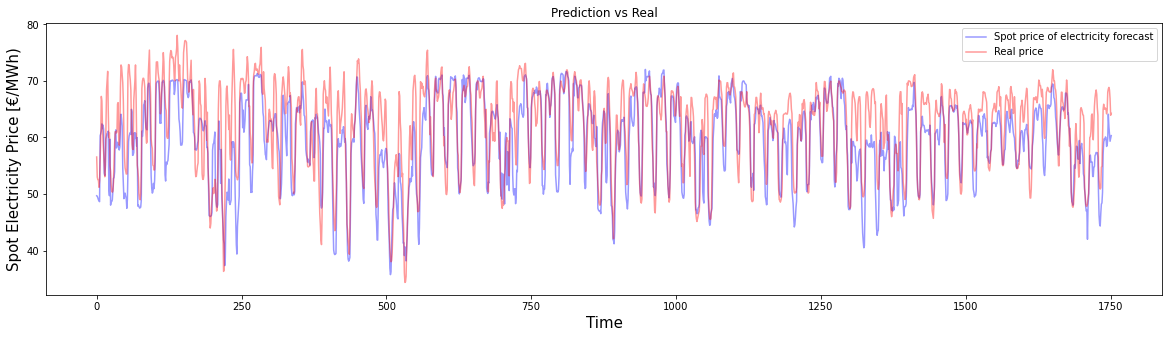

In [153]:
# Plot y_predict vs y_test

x = range(len(y_predict_inv))
plt.figure(figsize=(20,5))
plt.xlabel('Time', size=15)
plt.ylabel('Spot Electricity Price [€/MWh)', size=15)
plt.plot(x, y_predict_inv, alpha=0.4, color='blue', label='Spot price of electricity forecast')
plt.plot(x, y_test_inv, alpha=0.4, color='red',  label='Real price')
plt.title('Prediction vs Real')
plt.legend()
plt.show()